In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [76]:
train = pd.read_csv('titanic_train.csv')

In [77]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [78]:
train.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


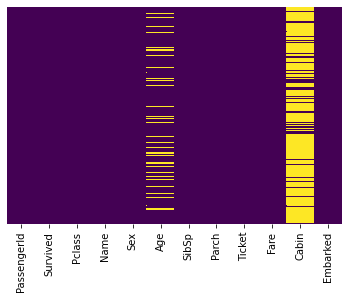

In [8]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#viewing null data values as a high level

In [9]:
sns.set_style('whitegrid')

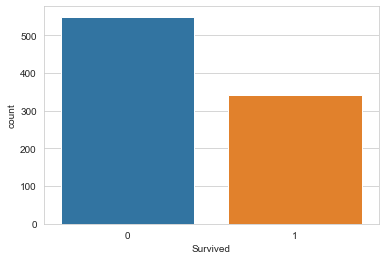

In [10]:
sns.countplot(x='Survived',data=train)

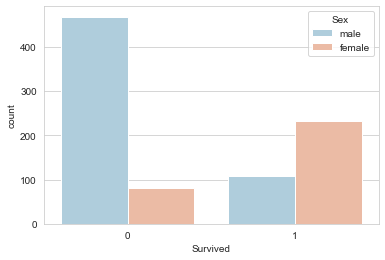

In [12]:
sns.countplot(x='Survived',data=train,hue='Sex',palette='RdBu_r')

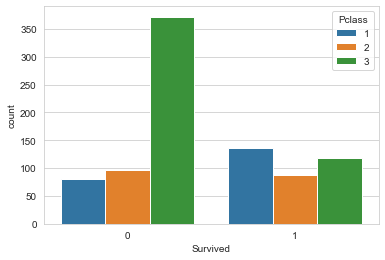

In [14]:
sns.countplot(x='Survived',data=train,hue='Pclass')

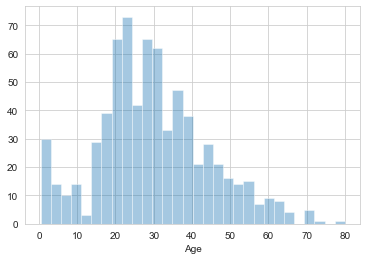

In [17]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

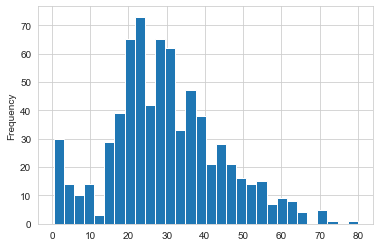

In [18]:
train['Age'].plot.hist(bins=30)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


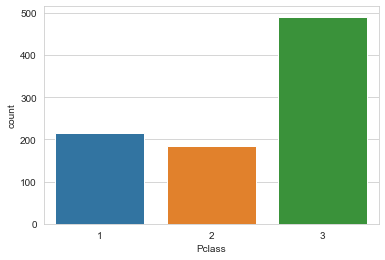

In [20]:
sns.countplot(x='Pclass',data=train)

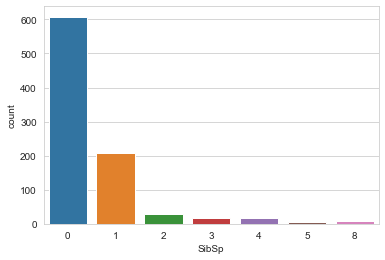

In [21]:
sns.countplot(x='SibSp',data=train)

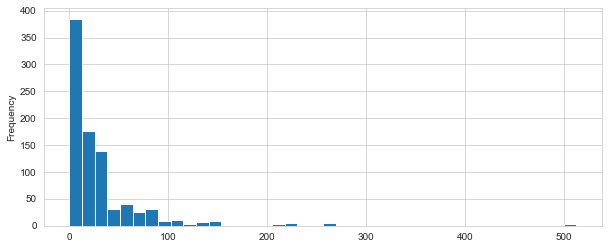

In [25]:
train['Fare'].plot.hist(bins=40,figsize=(10,4))

In [26]:
import cufflinks as cf

In [27]:
cf.go_offline()

In [29]:
#train['Fare'].iplot(kind='hist',bins=50)
#commented out to keep book clean when opening for first time.

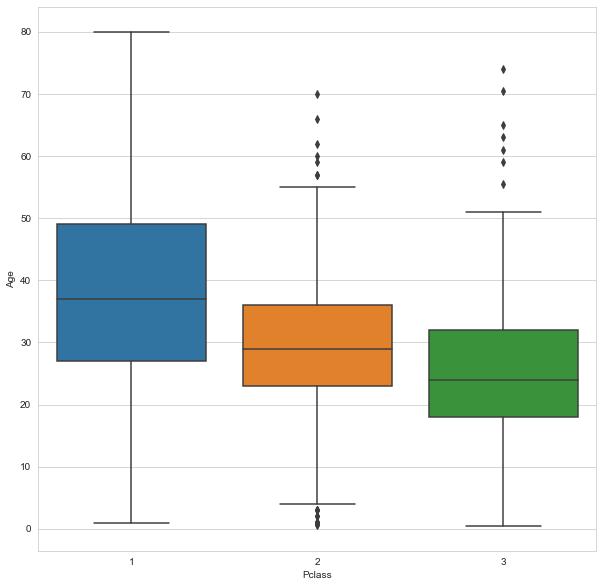

In [35]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Pclass',y='Age',data=train)

In [79]:
Pclass1MeanAge = train[train['Pclass'] == 1].mean()
Pclass2MeanAge = train[train['Pclass'] == 2].mean()
Pclass3MeanAge = train[train['Pclass'] == 3].mean()

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass ==1 :
            return 37
        elif Pclass ==2 :
            return 29
        else :
            return 24
    else :
        return Age
    

In [80]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

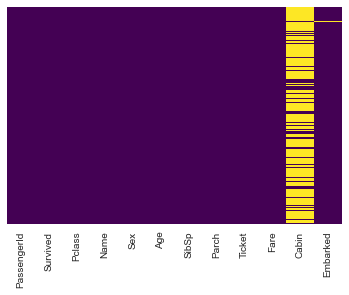

In [81]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#viewing null data values as a high level
#we have suplemented the unknown ages, but the unknown cabins are too great so we drop it

In [82]:
train.drop('Cabin',axis=1,inplace=True)

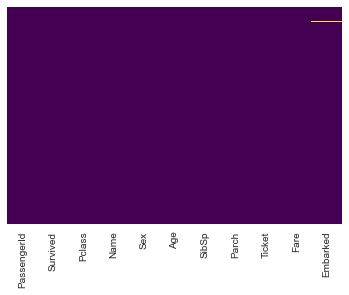

In [83]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [84]:
train.dropna(inplace=True)
#there was minimal missing values left, so we drop them.

In [85]:
#now dummy variables are needed to fix columns like Sex, replaces values with either 0 or 1
sex = pd.get_dummies(train['Sex'],drop_first=True)
#Be careful of multicolinearity so include the drop_first=True
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [86]:
#now dummy variables are needed to fix columns like Sex, replaces values with either 0 or 1
embark = pd.get_dummies(train['Embarked'],drop_first=True)
#Be careful of multicolinearity so include the drop_first=True
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [87]:
train = pd.concat([train,sex,embark],axis=1)

In [88]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [89]:
#We don't need Sex, Embarked any more due to dummy columns. Dropping columns we won't use
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [90]:
train.head()
#Now this is perfect for Machine Learning, except we have a passengerId to drop as well


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [91]:
train.drop('PassengerId',axis=1,inplace=True)

In [92]:
train.head()
#Now this is perfect for Machine Learning, we could also use dummies for Pclass

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [93]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [94]:
X.head()
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [97]:
from sklearn.linear_model import LogisticRegression

In [100]:
logmodel = LogisticRegression(solver = 'lbfgs',max_iter=400)

In [101]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=400)

In [102]:
predictions = logmodel.predict(X_test)

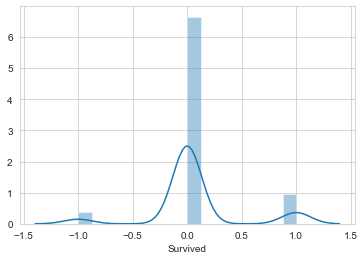

In [103]:
sns.distplot((y_test-predictions))

In [104]:
from sklearn.metrics import classification_report

In [105]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267

